# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [34]:
h0 = None 
# Hier eigenen Code schreiben ...
# berechnung des Volumens einens Kegels: V = 1/3 * Grundfläche * Höhe
# umstellen nach Höhe h = V*3/Grundfläche
# values:
V = 215 * 10**6        # Volumen des Sees in m^3
G = 10 * (10**3)**2    # Grundfläche (in m^2 umgeadnelt)
h0 = (V*3)/G
print("Höhe des Sees ist: %.2f m." %(h0))

Höhe des Sees ist: 64.50 m.


In [3]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [35]:
u_unten0 = None
Vdot0 = None
# Hier eigenen Code schreiben ...

# u_unten0 (Strömungsgeschwindigkeit am Ausfluss) berechnen
# u_unten0^2 = u_oben^2 + 2*g*z_oben - 2*g*z_unten
g = 9.81
z_oben = 64.5 # Höhe von Aufgabe 1.1)
z_unten = 0   # Grundhöhe
u_oben = 0    # Strömung an der Seeoberfläche ist nach ANnahme gleich 0
u_unten0_sqr = u_oben**2 + 2*g*z_oben - 2*g*z_unten
u_unten0 = u_unten0_sqr**0.5
print("Die Anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss ist: %.2f m/s" %(u_unten0))

# Vdot0 berechnen
# Vdot0 = Strömungsgeschwindigkeit am Ausfluss * Querschnitt des Ausflusses
A = 2 # aus Aufgabentext 
Vdot0 = u_unten0 * A
print("Der Volumenstrom ist: %.2f m^3/s" %(Vdot0))

Die Anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss ist: 35.57 m/s
Der Volumenstrom ist: 71.15 m^3/s


In [36]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [37]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (G/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.

In [44]:
#import math
def tiefe(v_neu):
    # h_neu = h_alt * c , wobei c = konstant <= 1, nach Strahlensatz bleibt das Verhältnis zwischen Höhe und Volumen
    #                                              bzw. Höhe und Radius vor und nach Leerung des Sees dasselbe
    # v_alt = g_alt * h_alt * 1/3 
    # v_neu = g_neu * h_neu * 1/3
    #       = pi * r_neu^2 * h_neu * 1/3
    #       = pi * (c * r_alt)^2 * c * h_alt * 1/3
    #       = pi * r_alt^2 * c^3 * h_alt * 1/3
    #       = g_alt * c^3 * h_alt * 1/3
    #
    # umstellen nach c:
    #     c = ((v_neu*3)/(g_alt * h_alt))**(1/3)  # old vs new depth
    #
    # c = h_neu/h_alt ersetzen
    # h_neu = ((v_neu*3)/(g_alt * h_alt))**(1/3) * h_alt
    #
    g_alt = G    # Grundfläche
    h_alt = h0
    h_neu = ((v_neu*3)/(g_alt * h_alt))**(1/3) * h_alt  # old vs new depth
    return h_neu  # Tiefe in Metern
    
#V = 10**8
#tiefe(V)

In [42]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [45]:
def abfluss(V0, dt):
    # Hier eigenen Code schreiben ...
    # v_alt = V0
    # t_total = 0
    # aus v_alt fließt dt lang wasser. Dann ist noch v_neu viel wasser im see übrig, 
    # mit v_neu = v_alt - vol_strom * dt 
    # und t_total = t_total + dt
    # und h = tiefe(v_neu)
    # -> h und t_total in liste speichern
    # wenn v_neu > 0 wiederhole den schritt
    zeiten = []
    tiefen = []
    t_total = 0
    v_neu = V0
    while(v_neu > 0):
        h_pre = tiefe(v_neu)
        zeiten.append(t_total)
        tiefen.append(h_pre)
        v_neu = max(v_neu - vol_strom(h_pre) * dt, 0.0)  # wir wollen kein negatives volumen
        t_total = t_total + dt
    return zeiten, tiefen
 
def vol_strom(h_pre):
    g = 9.81
    Aq = A
    u_unten = (2*h_pre*g)**(1/2)
    return u_unten*Aq
    
print(abfluss(10,1))

([0, 1, 2], [0.2319602463593557, 0.1927006723435085, 0.132040474086248])


In [46]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

  * Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
    * $\Delta t_1$ = 1 Minute
    * $\Delta t_2$ = 4 Tage
  * Zeichnen Sie beide Verläufe in dasselbe Diagramm und diskutieren Sie Auffälligkeiten.

_Hinweis: Der See kann auch als leer betrachtet werden, wenn im kommenden Zeitschritt mehr Wasser herausfließen würde als noch enthalten ist._

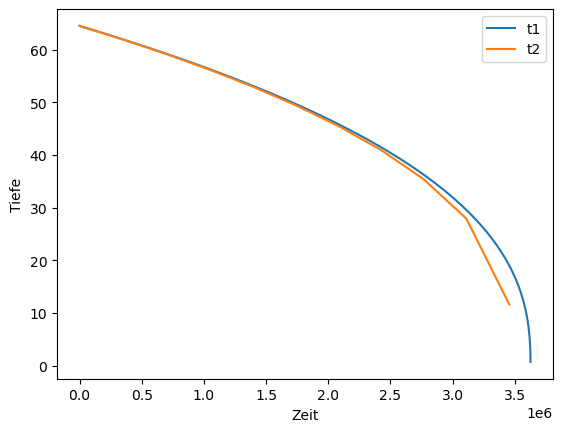

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

# Hier eigenen Code schreiben ...
V0 = 215e6     # Volumen des Sees
t1_x, t1_y = abfluss(V0, 60)
t2_x, t2_y = abfluss(V0, 4*24*60*60)  
  
    
plt.plot(t1_x, t1_y, label="t1")
plt.plot(t2_x, t2_y, label="t2")
plt.xlabel('Zeit')
plt.ylabel('Tiefe')
plt.legend()

# Auffäligkeiten: Der kürzere Zeit Step t1 findet eine Präzisere Lösung

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

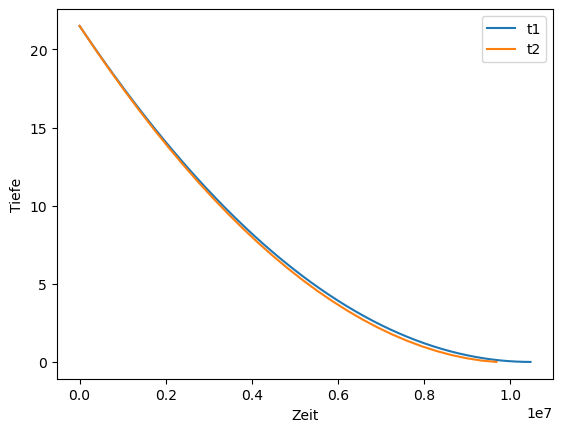

In [48]:
# Hier eigenen Code schreiben ...
def tiefe_zyl(v_neu):
    # h_neu = h_alt * c , wobei c = konstant <= 1, nach Strahlensatz bleibt das verhältniss zwischen Höhe und Volumen
    #                                              bzw. Hähe und Radius vor und nach Leerung des Sees dasselbe
    # v_alt = g_alt * h_alt 
    # v_neu = g_alt * h_neu 
    #       = g_alt * c * h_alt
    #
    # umstellen nach c:
    #     c = ((v_neu)/(g_alt * h_alt))    # old vs new depth
    #
    # c = h_neu/h_alt ersetzen
    # h_neu = ((v_neu)/(g_alt * h_alt)) * h_alt
    #
    g_alt = G    # Grundfläche
    h_neu = v_neu/g_alt  # old vs new depth, h_alt hat sich weggekürzt
    return h_neu
    
def abfluss_zyl(V0, dt):
    # Hier eigenen Code schreiben ...
    # v_alt = V0
    # t_total = 0
    # aus v_alt fließt dt lang wasser. Dann ist noch v_neu viel wasser im see übrig, 
    # mit v_neu = v_alt - vol_strom * dt 
    # und t_total = t_total + dt
    # und h = tiefe(v_neu)
    # -> h und t_total in liste speichern
    # wenn v_neu > 0 wiederhole den schritt
    zeiten = []
    tiefen = []
    t_total = 0
    v_neu = V0
    h_pre = tiefe_zyl(V0)
    zeiten.append(t_total)
    tiefen.append(tiefe_zyl(V0))
    while(v_neu > 0.01):
        v_neu = max(v_neu - vol_strom(h_pre) * dt, 0.0)  # wir wollen kein negatives volumen
        t_total = t_total + dt
        zeiten.append(t_total)
        tiefen.append(tiefe_zyl(v_neu))
        h_pre = tiefe_zyl(v_neu)
        #if h_pre < 0.01: break  # damit nicht unnötig lange kleineHöhen  werte gespoeichert werden
    return zeiten, tiefen

#print("Format: [Zeiten][Tiefen]")
#print(abfluss_zyl(V,60*60*24*7))


%matplotlib inline
import matplotlib.pyplot as plt
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

# Hier eigenen Code schreiben ...
V0 = 215e6     # Volumen des Sees
t1_x, t1_y = abfluss_zyl(V0, 60)
t2_x, t2_y = abfluss_zyl(V0, 4*24*60*60)   
  
    
plt.plot(t1_x, t1_y, label="t1")
plt.plot(t2_x, t2_y, label="t2")
plt.xlabel('Zeit')
plt.ylabel('Tiefe')
plt.legend()